## Question 1

* Which columns are (pairwise) correlated? Figure out how to do this with Pandas, and also how to do this with Seaborn.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('DF1', usecols=range(1, 5))

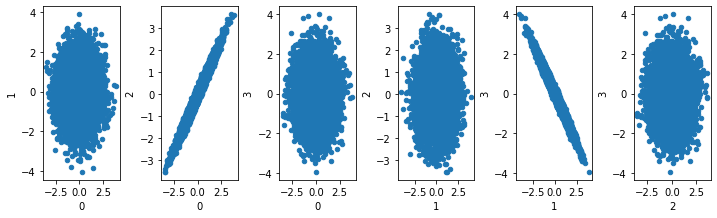

In [3]:
# with pandas
fig, axs = plt.subplots(nrows=1,ncols=6,figsize=(10, 3))
fig.tight_layout()

counter = 0
for i in range(0, 4):
    for j in range(i + 1, 4):
        data.plot.scatter(x=i, y=j, ax=axs[counter])
        counter += 1

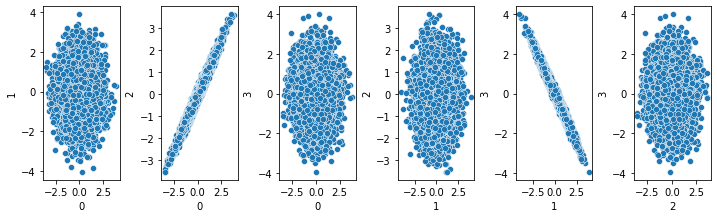

In [4]:
# with seaborn
fig, axs = plt.subplots(nrows=1,ncols=6,figsize=(10, 3))
fig.tight_layout()

counter = 0
for i in range(0, 4):
    for j in range(i + 1, 4):
        sns.scatterplot(data=data, x=f'{i}', y=f'{j}', ax=axs[counter])
        counter += 1

From the above plots, it can be seen that columns **0** and **2** & columns **1** & **3** are pairwise correlated, as they form a strong positive or negative linear figure when plotted. The others seem to have no correlation pairwise.

* Compute the covariance matrix of the data. Write the explicit expression for what this is, and then use any command you like (e.g., np.cov) to compute the 4×4 matrix. Explain why the numbers that you get fit with the plots you got.

The formula to calculate the covariance matrix is as follows:  
  
$\mathbf{C} = \frac{1}{n - 1}\mathbf{D}_{cent}^{T}\mathbf{D}_{cent}$  
  
where $n$ is the number of samples, and $\mathbf{D}_{cent}$ is the sample matrix, with each column centered about the mean.

In [5]:
np.cov(np.transpose(data.to_numpy()))

array([[ 1.00155793, -0.00401176,  0.99162409,  0.00412485],
       [-0.00401176,  1.00537841, -0.00409877, -0.99545662],
       [ 0.99162409, -0.00409877,  1.00158867,  0.00408108],
       [ 0.00412485, -0.99545662,  0.00408108,  1.00516828]])

The covariance array for this dataset appears to show a strong covariance between columns **0** and **2** & columns **1** & **3**. This is the same as the results from the plots, as correlation is just a scalar multiple of covariance, so columns that are correlated to a high degree should show a relative higher covariance than other columns. Furthermore, the correlation numbers in this case should strongly match the covariance numbers, as the data was drawn from gaussians with $\sigma = 1$, so the multiplier for correlation is just 1.

* The  above  problem  in  reverse. Generate  a  zero-mean  multivariate  Gaussian  random variable in 3 dimensions,$Z= (X1,X2,X3)$ so that $(X1,X2)$ and $(X1,X3)$ are uncorrelated, but $(X2,X3)$ are correlated.  Specifically:  choose a covariance matrix that has theabove correlations structure, and write this down.  Then find a way to generate samples from  this  Gaussian.   Choose  one  of  the  non-zero  covariance  terms  ($C_{ij}$, if $C$ denotes your covariance matrix) and plot it vs the estimated covariance term, as the number of samples you use scales.  The goal is to get a visual representation of how the empirical covariance converges to the true (or family) covariance.

Text(0, 0.5, 'Cov(2, 3)')

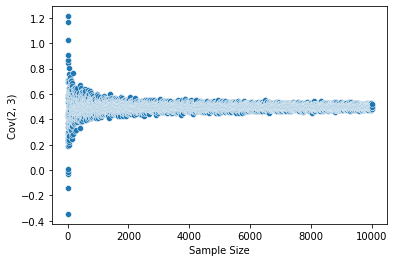

In [6]:
mean = np.array([0, 0, 0])
cov = np.array([[1, 0, 0], [0, 1, 0.50], [0, 0.50, 1]])

sample_sizes = list(range(2, 10000))
covariance_terms = []

for i in sample_sizes:
    norm = np.random.multivariate_normal(mean, cov, i)
    covariance_terms.append(np.cov(np.transpose(norm))[1][2])

sns.scatterplot(x=sample_sizes, y=covariance_terms)
plt.xlabel('Sample Size')
plt.ylabel('Cov(2, 3)')

The graph above plots $C_{23}$ versus sample size. The chosen covariance matrix was $\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0.5 \\ 0 & 0.5 & 1 \end{bmatrix}$, so the true value of $C_{23}$ was $0.5$. As can be seen in the graph above, this is the value point estimates of $C_{23}$ approach at larger sample sizes. 

## Question 3

Generate data as follows: $x_{i} ∼ N(0,1), e_{i} ∼ N(0,1)$.  Generate y by $y_i = β_0 + x_{i}β+e_i$, where $β_0 = −3$ and $β = 0$.

In [7]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

def generate_data(size):
    e_i = np.random.normal(0, 1, size)
    x_i = np.random.normal(0, 1, size)
    return (np.column_stack((x_i, np.ones(size))), -3 + (0 * x_i) + e_i)

* By creating fresh data and each time computing $\hat{\beta}$ and recording $\hat{\beta} - \beta$, compute the empirical  standard deviation of the error for $n= 150$.  By running a linear regression of y vs. noise, we find $\hat{\beta} = -0.15$.  Given your empirical computation of the standard deviation of the error, how significant is the value −0.15?

In [20]:
errs = []

for i in range(2000): # get 2000 samples of the error
    x, y = generate_data(150)
    beta = np.linalg.inv(x.T @ x) @ x.T @ y
    errs.append(beta[0] - 0) # true beta is 0, so error is just value of beta_hat[0]
    
std_err = np.std(errs, ddof=1)
print('Standard deviation of error:', std_err) # ddof = 1 to divide by n-1 instead of n (sample vs population std. dev)

delta = -0.15/std_err
print(f'-0.15 is {np.abs(delta)} standard deviations away from the mean')
p_value = norm.cdf(delta) - norm.cdf(-delta)
print(f'The probability this occured with our given noise model is {abs(p_value)}')

Standard deviation of error: 0.08071667186296662
-0.15 is 1.8583521413600437 standard deviations away from the mean
The probability this occured with our given noise model is 0.9368809761522772


A $\hat{\beta}$ of -0.15 is, according to our empirical value, approximately 1.86 standard distributions away from the mean, and has an approximately 94% chance of originating from our noise model (assuming normally-distributed errors), which indicates it is not very statistically significant, as there is a very high chance our model is correct.

* Now repeat the above experiment for different values of n. Plot these values, and on the same plot, plot $\frac{1}{\sqrt{n}}$.  How is the fit?

In [551]:
std_devs = []

for n in range(150, 1500):
    errs = []
    for i in range(500):
        x, y = generate_data(n)
        beta = np.linalg.inv(x.T @ x) @ x.T @ y
        errs.append(beta[0] - 0) # true beta is 0, so error is just value of beta_hat[0]
    std_devs.append(np.std(errs, ddof=1))

Text(0, 0.5, 'Std. deviation')

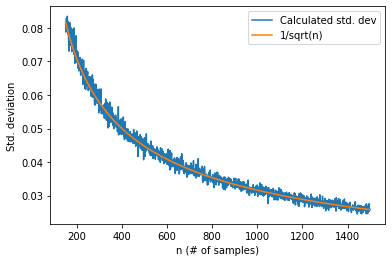

In [550]:
plt.plot(range(150, 1500), std_devs, label='Calculated std. dev')
plt.plot(range(150, 1500), [1/np.sqrt(x) for x in range (150, 1500)], label='1/sqrt(n)')
plt.legend()
plt.xlabel('n (# of samples)')
plt.ylabel('Std. deviation')

The fit is very close to the graph of $\frac{1}{\sqrt{n}}$, as expected.